#### **Miniproject_7_FBI_crime**

Part I



Data Source
This is an excel sheet that needs to be read using pandas.

FBI Crime Data
https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013
https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/resource-pages/downloads/download-files

Excel file “Table_45_Arrest_Trends_Cities_by_Sex_2012-2013.xls”

Sample data can be found in Appendix here.
Google Drive
https://drive.google.com/drive/u/0/folders/1RYt7AaM2SSA3kc-N_W7tgV7bt-zjEMYm


In [ ]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
data = pd.read_excel(r'/content/gdrive/My Drive/mini project/Offense_Charged_2012_2013.xlsx')
display(pd.DataFrame(data))
df = pd.DataFrame(data)

,Offense charged,Male Total 2012,Male Total 2013,Male Total Percent Change,Male Under 18 2012,Male Under 18 2013,Male Under 18 Percent Change,Female Total 2012,Female Total 2013,Female Total Percent Change,Female Under 18 2012,Female Under 18 2013,Female Under 18 Percent Change
0,TOTAL,4226004,3982894,-5.8,464491,393802,-15.2,1542185,1477114,-4.2,199040,165669,-16.8
1,Murder and nonnegligent manslaughter,4216,4127,-2.1,295,322,9.2,526,537,2.1,33,49,48.5
2,Rape,8253,7712,-6.6,1160,1089,-6.1,81,116,43.2,21,44,109.5
3,Robbery,46069,45171,-1.9,9562,9364,-2.1,7063,6954,-1.5,1141,997,-12.6
4,Aggravated assault,146996,139659,-5.0,12885,11200,-13.1,45034,43277,-3.9,4351,3848,-11.6
5,Burglary,112908,103205,-8.6,24252,20516,-15.4,23819,22871,-4.0,3720,2999,-19.4
6,Larceny-theft,378457,376392,-0.5,70846,62092,-12.4,306805,300211,-2.1,54387,45196,-16.9


1)**Between 2012 and 2013, which has the highest Robbery for Male in Total. Print Top 5.**

In [ ]:
df['Total Male Robbery 2012-2013'] = df['Male Total 2012'] + df['Male Total 2013']

robbery_top5 = df[df['Offense charged'] == 'Robbery'][['Offense charged', 'Male Total 2012', 'Male Total 2013', 'Total Male Robbery 2012-2013']]
robbery_top5_sorted = robbery_top5.nlargest(5, 'Total Male Robbery 2012-2013')


print(tabulate(robbery_top5_sorted, headers='keys', tablefmt='grid'))

+----+-------------------+-------------------+-------------------+--------------------------------+
|    | Offense charged   |   Male Total 2012 |   Male Total 2013 |   Total Male Robbery 2012-2013 |
+====+===================+===================+===================+================================+
|  3 | Robbery           |             46069 |             45171 |                          91240 |
+----+-------------------+-------------------+-------------------+--------------------------------+


2)**Average # of Rape by Male between the year 2012 and 2013.**

In [ ]:
rape_data = df[df['Offense charged'] == 'Rape'][['Male Total 2012', 'Male Total 2013']]

rape_data['Average Male Rape 2012-2013'] = rape_data[['Male Total 2012', 'Male Total 2013']].mean(axis=1)

print(tabulate(rape_data[['Male Total 2012', 'Male Total 2013', 'Average Male Rape 2012-2013']], headers='keys', tablefmt='grid'))

+----+-------------------+-------------------+-------------------------------+
|    |   Male Total 2012 |   Male Total 2013 |   Average Male Rape 2012-2013 |
+====+===================+===================+===============================+
|  2 |              8253 |              7712 |                        7982.5 |
+----+-------------------+-------------------+-------------------------------+


3)**Between Male Under 18 and Female Under 18, who has done the highest number of Offences in “Murder and nonnegligent manslaughter” and what is percentage difference between them?**

In [ ]:
murder_data = df[df['Offense charged'] == 'Murder and nonnegligent manslaughter'][['Male Under 18 2013', 'Female Under 18 2013']]

highest_offender = 'Male Under 18' if murder_data['Male Under 18 2013'].values[0] > murder_data['Female Under 18 2013'].values[0] else 'Female Under 18'
percentage_difference = abs((murder_data['Male Under 18 2013'].values[0] - murder_data['Female Under 18 2013'].values[0]) / murder_data[['Male Under 18 2013', 'Female Under 18 2013']].max(axis=1).values[0]) * 100

result = pd.DataFrame({
    'Category': ['Male Under 18', 'Female Under 18', 'Highest Offender', 'Percentage Difference'],
    'Value': [murder_data['Male Under 18 2013'].values[0], murder_data['Female Under 18 2013'].values[0], highest_offender, f"{percentage_difference:.2f}%"]
})

print(tabulate(result, headers='keys', tablefmt='grid'))

+----+-----------------------+---------------+
|    | Category              | Value         |
+====+=======================+===============+
|  0 | Male Under 18         | 322           |
+----+-----------------------+---------------+
|  1 | Female Under 18       | 49            |
+----+-----------------------+---------------+
|  2 | Highest Offender      | Male Under 18 |
+----+-----------------------+---------------+
|  3 | Percentage Difference | 84.78%        |
+----+-----------------------+---------------+


4**)Group bar plot for Male (Total) in the year 2012 and 2013.**

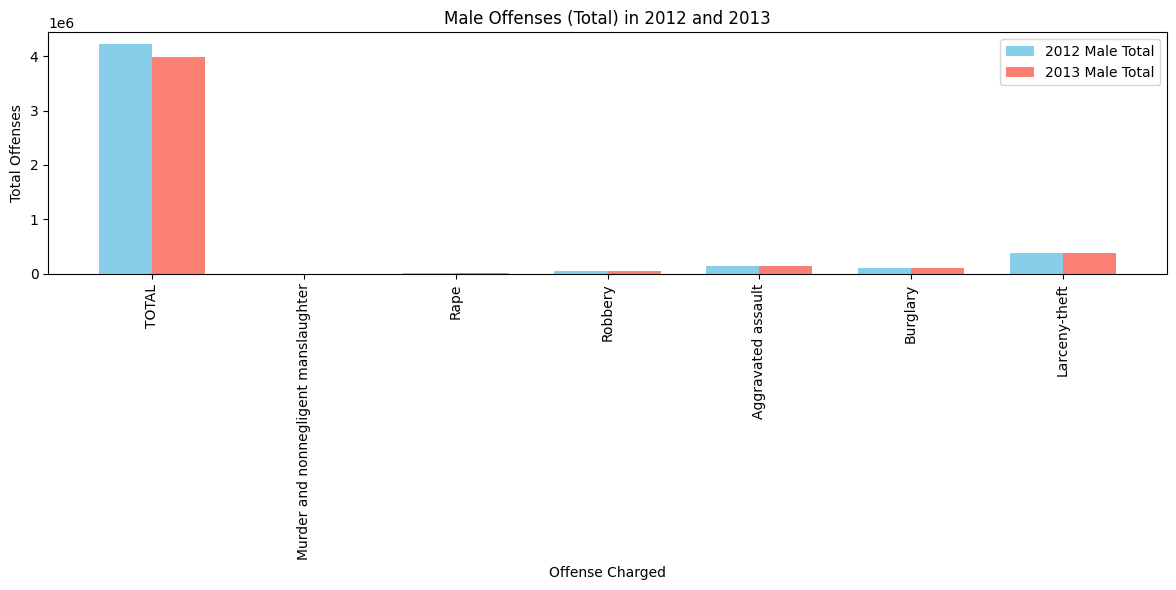

In [ ]:
offenses = df['Offense charged']
male_2012 = df['Male Total 2012']
male_2013 = df['Male Total 2013']
female_2012 = df['Female Total 2012']
female_2013 = df['Female Total 2013']

x = np.arange(len(offenses))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, male_2012, width, label='2012 Male Total', color='skyblue')
plt.bar(x + width/2, male_2013, width, label='2013 Male Total', color='salmon')
plt.xlabel('Offense Charged')
plt.ylabel('Total Offenses')
plt.title('Male Offenses (Total) in 2012 and 2013')
plt.xticks(ticks=x, labels=offenses, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


 5)**Group bar plot for Female (Total) in the year 2012 and 2013.**

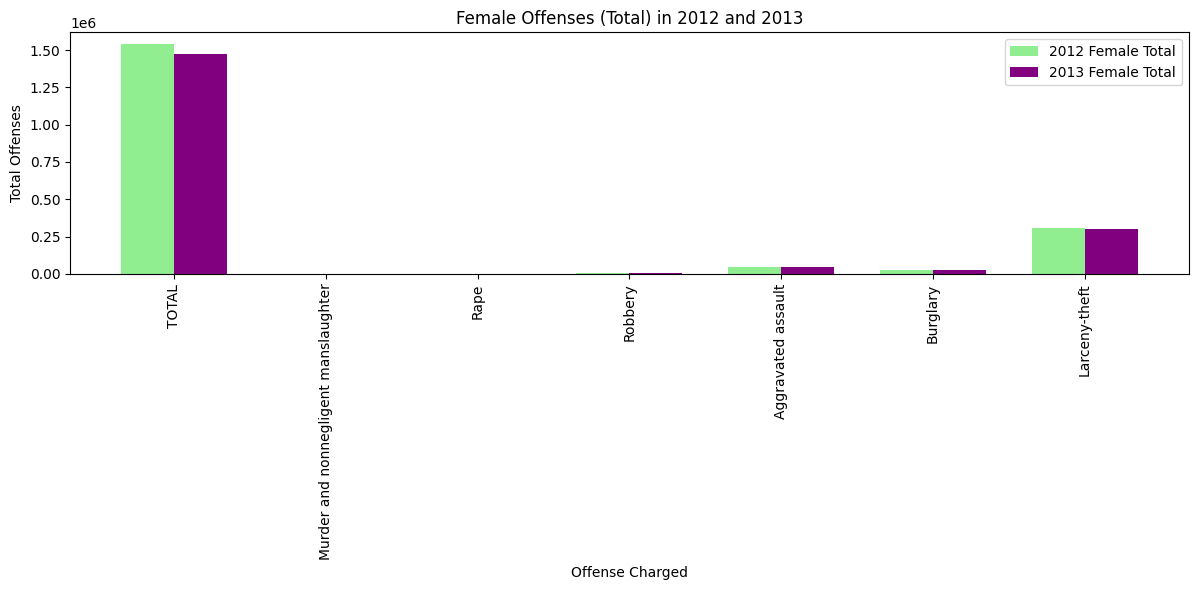

In [ ]:
offenses = df['Offense charged']
male_2012 = df['Male Total 2012']
male_2013 = df['Male Total 2013']
female_2012 = df['Female Total 2012']
female_2013 = df['Female Total 2013']

x = np.arange(len(offenses))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, female_2012, width, label='2012 Female Total', color='lightgreen')
plt.bar(x + width/2, female_2013, width, label='2013 Female Total', color='purple')
plt.xlabel('Offense Charged')
plt.ylabel('Total Offenses')
plt.title('Female Offenses (Total) in 2012 and 2013')
plt.xticks(ticks=x, labels=offenses, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data = pd.read_excel(r'/content/gdrive/My Drive/mini project/miniproject 7.xlsx')
display(pd.DataFrame(data))
data_percentage.melt = pd.DataFrame(data)

,Commodity,unit,1994–95,1995–96,1996–97,1997–98,1998–99,1999–00,2000–01,2001–02,...,2015–16,2016–17,2017–18,2018–19,2019–20,2020–21,2021–22,2022–23 s.1,2023–24 f.1,2024–25 f
0,Nominal value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total farm production,$m,24250.036,27940.680,28753.765,29017.277,29474.162,31167.877,35567.955,40701.132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,%,0.000,15.219,2.910,0.916,1.575,5.746,14.117,14.432,...,739.679,756.920,761.247,730.944,760.121,773.543,779.852,799.821,786.866,798.264
3,Crops,$m,11508.810,15723.773,16539.839,15982.161,16727.066,17628.859,19733.330,22280.018,...,717.970,736.970,740.943,735.058,741.836,775.609,786.335,788.623,799.925,800.638
4,NaN,%,0.000,36.624,5.190,-3.372,4.661,5.391,11.938,12.906,...,226.311,246.261,266.565,262.451,280.736,278.670,272.186,283.385,276.681,274.307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,%,0.000,11.451,-9.138,1.059,-3.340,4.750,14.536,25.873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,Wool,index,54.994,44.331,44.851,48.815,36.371,40.451,46.820,54.267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,%,0.000,-19.389,1.174,8.839,-25.492,11.217,15.745,15.905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,Milk,index,51.763,57.368,54.581,52.399,50.020,48.113,50.831,57.908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Part II


Google Drive
Read "Table 3" from file "02_AgCommodities202403_Stats_v1.0.0.xlsx" located in the following link:
https://drive.google.com/drive/u/0/folders/1bn9SquY5jOQrbmoqJX33lfKRM1RrTGVB
Header for the "Table 3" after reading with df.read_csv:
header = ["","Commodity","unit","1994–95","1995–96","1996–97","1997–98","1998–99","1999–00","2000–01","2001–02","2002–03","2003–04","2004–05","2005–06","2006–07","2007–08","2008–09","2009–10","2010–11","2011–12","2012–13","2013–14","2014–15","2015–16","2016–17","2017–18","2018–19","2019–20","2020–21","2021–22","2022–23 s","2023–24 f","2024-25 f"]
Questions (Part II)


**1)Filter out rows with only unit="%" but expected the columns with years such as "1994–95","1995–96", "2023–24 f","2024-25 f" should be converted to rows and add a new column named "Value" that should have the values from these columns  with years. One more thing "Community" should not be empty for the rows with unit="%" but they should take its values from its corresponding unit="$m" rows.**

In [ ]:
data_percentage = data[data['unit'] == "%"]

year_columns = ["1994–95", "1995–96", "2023–24 f", "2024-25 f"]
melted_data = data_percentage.melt(id_vars=["Commodity", "unit"], value_vars=year_columns,
                                   var_name="Years", value_name="Value")

data_dollar = data[data['unit'] == "$m"].set_index(["Commodity"])
melted_data['Commodity'] = melted_data['Commodity'].fillna(method='ffill')

print(melted_data)

     Commodity unit      Years   Value
0          NaN    %    1994–95   0.000
1          NaN    %    1994–95   0.000
2          NaN    %    1994–95   0.000
3          NaN    %    1994–95   0.000
4          NaN    %    1994–95   0.000
..         ...  ...        ...     ...
151        NaN    %  2024-25 f   9.840
152        NaN    %  2024-25 f  14.901
153        NaN    %  2024-25 f   7.567
154        NaN    %  2024-25 f   5.754
155        NaN    %  2024-25 f  -6.111

[156 rows x 4 columns]


<ipython-input-18-2aa1a31b455f>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melted_data['Commodity'] = melted_data['Commodity'].fillna(method='ffill')
<ipython-input-18-2aa1a31b455f>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  melted_data['Commodity'] = melted_data['Commodity'].fillna(method='ffill')


In [ ]:
data = pd.read_excel(r'/content/gdrive/My Drive/mini project/Credit card Fraud detection.xlsx')
display(pd.DataFrame(data))
data = pd.DataFrame(data)

,Transaction_Time,Transaction_Amount,Account_Balance,Transaction_Frequency,Is_fraud
0,15794,83.320000,1532.450000,2,0
1,83942,47.120000,4200.110000,3,0
2,74682,202.830000,331.280000,4,1
3,42223,15.420000,405.370000,2,0
4,6591,98.310000,1800.220000,1,0
5,1818,130.222213,3774.454218,2,0
6,12905,42.178718,3642.224235,4,0
7,66320,247.879756,1120.866190,5,0
8,56775,6.658478,2666.784116,5,0
9,76879,0.933758,3772.712701,4,0


**2)Credit Card Fraud Detection: Credit Card Fraud classification using SVM Classifier & KNN Classifier Column value to be classified is in column "Is_fraud" and all other columns are the features. Use two-fold cross validation and evaluation metrics: Precision, Recall, F1-score, Accuracy [wiki]. Also print confusion matrix [wiki]. Refer basic notebook template for some code and also internet.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
X = data.drop(columns=['Is_fraud'])
y = data['Is_fraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = []
for model_name, model in models.items():
    y_pred = cross_val_predict(model, X_scaled, y, cv=skf, method='predict')
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Accuracy": accuracy,
        "Confusion_Matrix": cm.tolist()
    })
results_df = pd.DataFrame(results)
print(results_df)

# Save to Excel
results_df.to_excel("credit_card_fraud_results.xlsx", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  Model  Precision  Recall  F1-score  Accuracy     Confusion_Matrix
0   SVM        0.0     0.0       0.0     0.951  [[951, 0], [49, 0]]
1   KNN        0.0     0.0       0.0     0.949  [[949, 2], [49, 0]]
